<a href="https://colab.research.google.com/github/youbo71/Data_EPF/blob/master/TP_n%C2%B01_data_LIEVA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import io
from google.colab import files
from pylab import rcParams
from statsmodels.tsa.stattools import adfuller


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Useful links

**numpy** https://www.numpy.org/

**pandas** https://pandas.pydata.org/

**matplotlib** https://matplotlib.org/

**colab** https://colab.research.google.com/notebooks/welcome.ipynb

# **Getting the data**
The data is released by Open Power System Data plateforme under Creative Commons Attribution-International license, based on consumptuon and production of several German small business households.


In [0]:
link = "https://bit.ly/2L5Kof1"

In [0]:
uploaded = files.upload()

Saving ProductionConsumptionGermanIndustrialParc.csv to ProductionConsumptionGermanIndustrialParc.csv


In [0]:
data = pd.read_csv(io.BytesIO(uploaded['ProductionConsumptionGermanIndustrialParc.csv']))
data.tail(5)

,Unnamed: 0,timestamp,offices,chemistry_room,clean_room,printing_room,printing_room.1,compressor,cooling_aggregate,cooling_pumps,dishwasher,electric_vehicle,facility_cvd_centrotherm,facility_diffusion_centrotherm,facility_diffusion_tecnofirmes,facility_furnace_centrotherm,facility_indus_rena,grid_import,solar_production,solar_production_facade,solar_production_roof,refrigerator,ventilation
63934,63934,2017-02-09T10:45:00Z,13424.025,5040.495,23093.75,4627.73,32626.156,40275.797,56638.219,146264.156,711.11,718.032,110523.781,172840.375,378.812,33756.562,4184.906,695060.75,20748.281,6264.996,14502.074,381.981,154614.75
63935,63935,2017-02-09T11:00:00Z,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
63936,63936,2017-02-09T11:15:00Z,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
63937,63937,2017-02-09T11:30:00Z,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
63938,63938,2017-02-09T11:45:00Z,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [0]:
data.index = data.timestamp
data.index = pd.to_datetime(data.index)
data = data.drop (['Unnamed: 0', 'timestamp'], axis=1)
data.head()

,offices,chemistry_room,clean_room,printing_room,printing_room.1,compressor,cooling_aggregate,cooling_pumps,dishwasher,electric_vehicle,facility_cvd_centrotherm,facility_diffusion_centrotherm,facility_diffusion_tecnofirmes,facility_furnace_centrotherm,facility_indus_rena,grid_import,solar_production,solar_production_facade,solar_production_roof,refrigerator,ventilation
timestamp,,,,,,,,,,,,,,,,,,,,,
2015-04-15 11:15:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-04-15 11:30:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-04-15 11:45:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-04-15 12:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-04-15 12:15:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [0]:
data = data.apply(pd.to_numeric,errors='coerce')
data.head()

,offices,chemistry_room,clean_room,printing_room,printing_room.1,compressor,cooling_aggregate,cooling_pumps,dishwasher,electric_vehicle,facility_cvd_centrotherm,facility_diffusion_centrotherm,facility_diffusion_tecnofirmes,facility_furnace_centrotherm,facility_indus_rena,grid_import,solar_production,solar_production_facade,solar_production_roof,refrigerator,ventilation
timestamp,,,,,,,,,,,,,,,,,,,,,
2015-04-15 11:15:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-04-15 11:30:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-04-15 11:45:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-04-15 12:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-04-15 12:15:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [0]:
print("lenght of dataframe whithout rows where alls value are NA is {} \n that represent {} of initial dataset \n".format(len(data.dropna(how="all").index), len(data.dropna(how="all").index)/len(data.index)))
print("lenght of dataframe without row where at least one value is NA is {} \n that represents{} of initial dataset \n".format(len(data.dropna(how="any").index), len(data.dropna(how="any").index)/len(data.index)))

lenght of dataframe whithout rows where alls value are NA is 34931 
 that represent 0.5463175839471996 of initial dataset 

lenght of dataframe without row where at least one value is NA is 20626 
 that represents0.32258871737124445 of initial dataset 



In [0]:
for col, row in data.items():
  print("First non NaN value for column '{}' is at index {}".format(col, row.first_valid_index()))

First non NaN value for column 'offices' is at index 2016-02-11 10:15:00+00:00
First non NaN value for column 'chemistry_room' is at index 2016-02-11 10:15:00+00:00
First non NaN value for column 'clean_room' is at index 2016-02-11 10:15:00+00:00
First non NaN value for column 'printing_room' is at index 2016-02-11 10:15:00+00:00
First non NaN value for column 'printing_room.1' is at index 2016-02-11 10:15:00+00:00
First non NaN value for column 'compressor' is at index 2016-02-11 10:15:00+00:00
First non NaN value for column 'cooling_aggregate' is at index 2016-02-11 10:15:00+00:00
First non NaN value for column 'cooling_pumps' is at index 2016-02-11 10:15:00+00:00
First non NaN value for column 'dishwasher' is at index 2016-02-11 10:15:00+00:00
First non NaN value for column 'electric_vehicle' is at index 2016-03-27 12:00:00+00:00
First non NaN value for column 'facility_cvd_centrotherm' is at index 2016-02-11 10:15:00+00:00
First non NaN value for column 'facility_diffusion_centroth

In [0]:
for col, row in data.items():
  print("Last non null value for column '{}' is at index {}".format(col, row.last_valid_index()))

Last non null value for column 'offices' is at index 2017-02-09 10:45:00+00:00
Last non null value for column 'chemistry_room' is at index 2017-02-09 10:45:00+00:00
Last non null value for column 'clean_room' is at index 2017-02-09 10:45:00+00:00
Last non null value for column 'printing_room' is at index 2017-02-09 10:45:00+00:00
Last non null value for column 'printing_room.1' is at index 2017-02-09 10:45:00+00:00
Last non null value for column 'compressor' is at index 2017-02-09 10:45:00+00:00
Last non null value for column 'cooling_aggregate' is at index 2017-02-09 10:45:00+00:00
Last non null value for column 'cooling_pumps' is at index 2017-02-09 10:45:00+00:00
Last non null value for column 'dishwasher' is at index 2017-02-09 10:45:00+00:00
Last non null value for column 'electric_vehicle' is at index 2017-02-09 10:45:00+00:00
Last non null value for column 'facility_cvd_centrotherm' is at index 2017-02-09 10:45:00+00:00
Last non null value for column 'facility_diffusion_centroth

In [0]:
full_data = data['2016-02-11 10:15:00' : '2017-02-09 10:45:00']
full_data.head(10)
percent_missing = full_data.isnull().sum() * 100 / len(full_data)
missing_value_df = pd.DataFrame({'column_name' : full_data.columns, 'percent_missing' : percent_missing})
missing_value_df.sort_values('percent_missing', ascending = False, inplace = True)
missing_value_df


,column_name,percent_missing
electric_vehicle,electric_vehicle,32.789653
dishwasher,dishwasher,13.248634
refrigerator,refrigerator,5.353822
facility_cvd_centrotherm,facility_cvd_centrotherm,3.556815
printing_room,printing_room,3.556815
printing_room.1,printing_room.1,3.556815
facility_diffusion_centrotherm,facility_diffusion_centrotherm,3.556815
facility_diffusion_tecnofirmes,facility_diffusion_tecnofirmes,3.556815
facility_indus_rena,facility_indus_rena,3.556815
clean_room,clean_room,3.553953


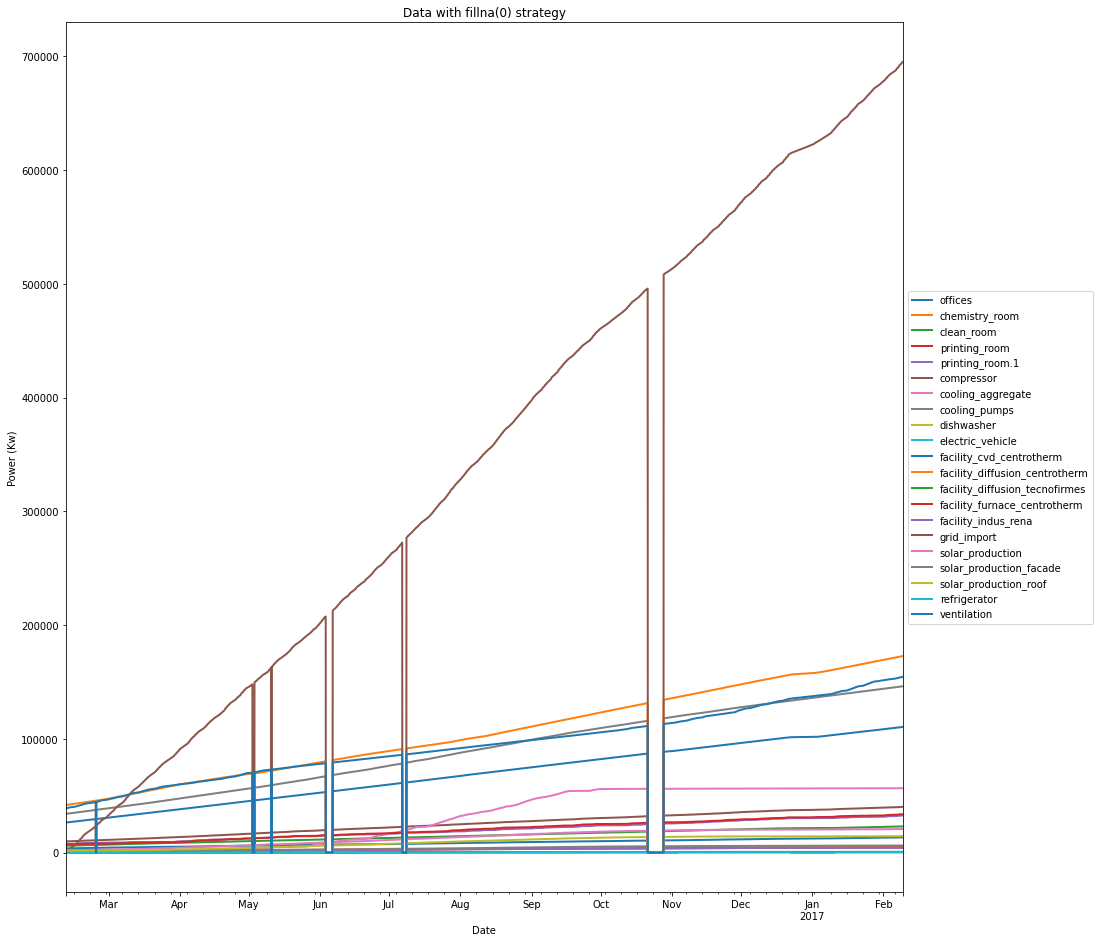

In [0]:
full_data.fillna(0).plot(title=("Data with fillna(0) strategy"), figsize=(15,16), lw=2)
plt.xlabel('Date')
plt.ylabel('Power (Kw)')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

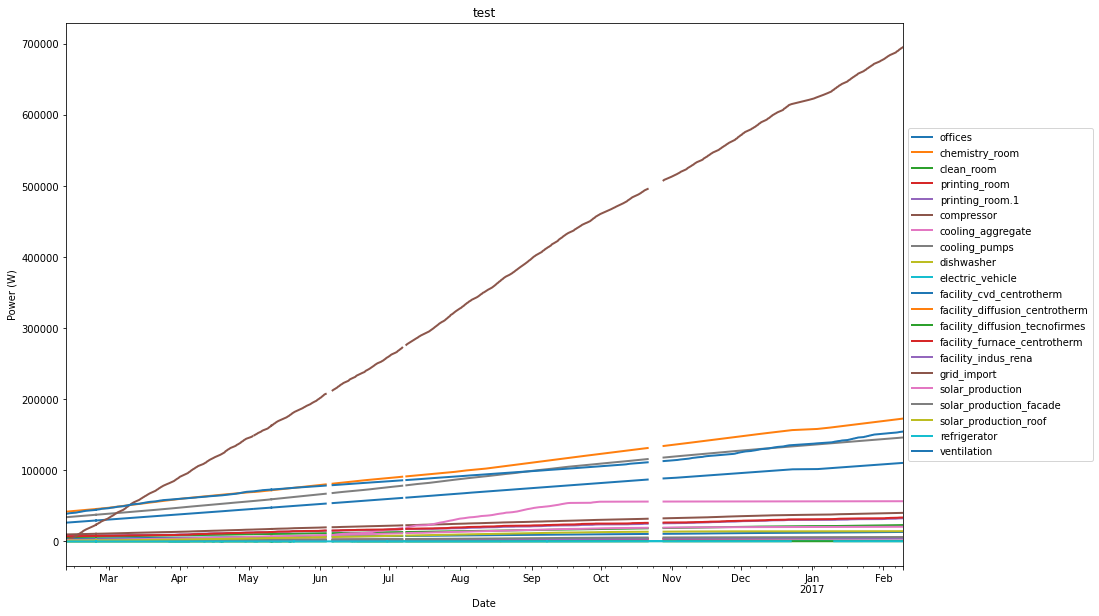

In [0]:
def plot_df(df,title):
  df.plot(title=(title), figsize=(15,10), lw=2)
  plt.xlabel('Date')
  plt.ylabel('Power (W)')
  plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
  plt.show()

plot_df(full_data, "test")

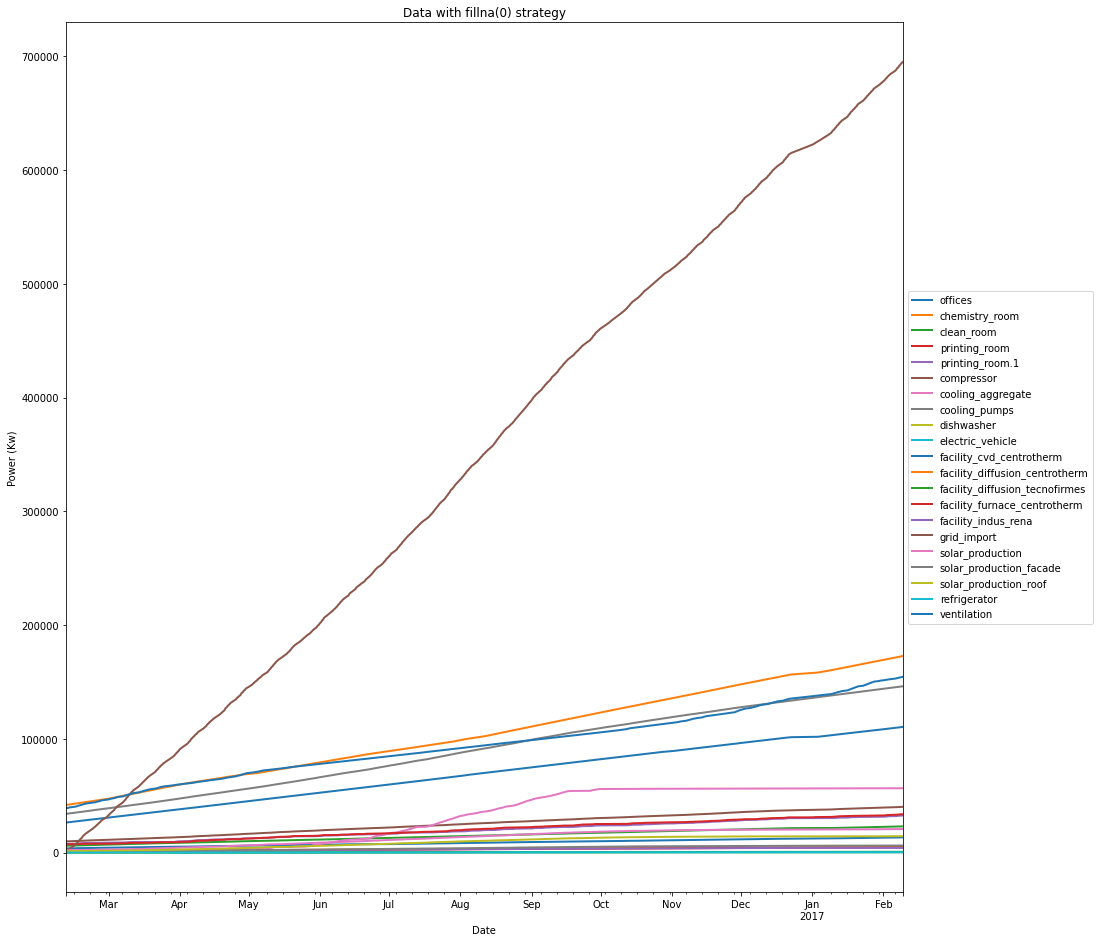

In [0]:
full_data.interpolate(method = "linear", limit_direction = "forward").plot(title=("Data with fillna(0) strategy"), figsize=(15,16), lw=2)
plt.xlabel('Date')
plt.ylabel('Power (Kw)')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

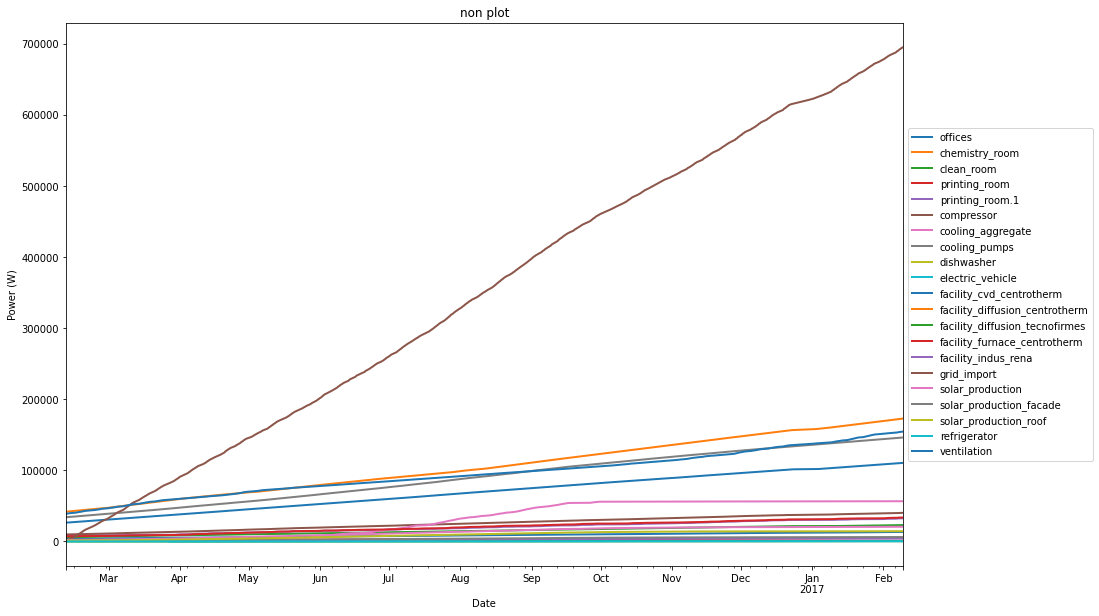

In [0]:
clean_df = full_data.interpolate(method = "linear", limit_direction = "forward")
clean_df
plot_df(clean_df, "non plot")

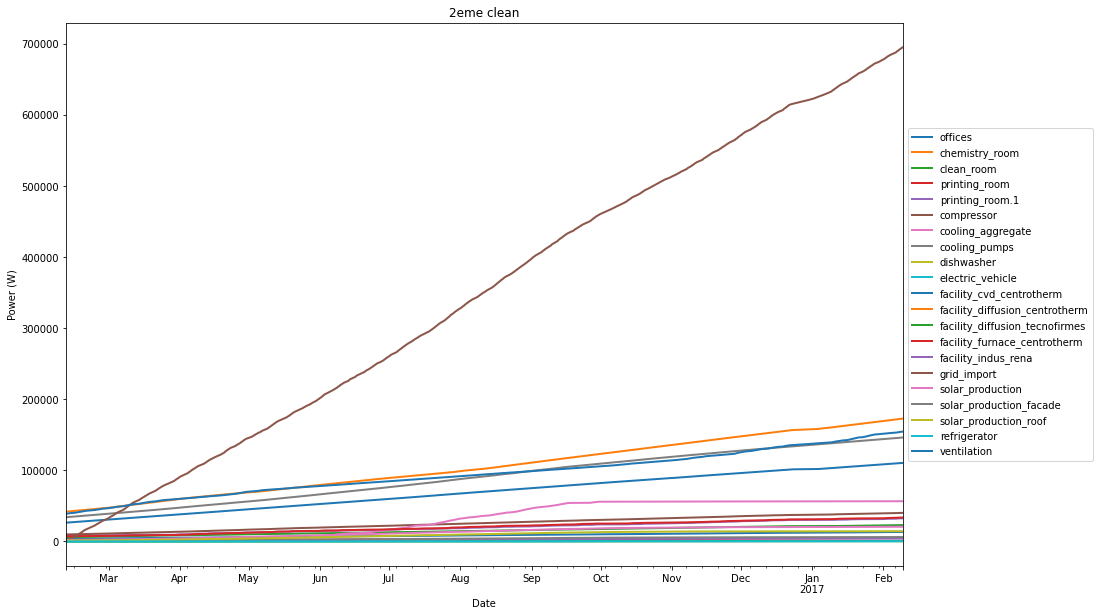

In [0]:
clean_df_2 = clean_df.fillna(method="bfill")
clean_df_2
plot_df(clean_df_2, "2eme clean")

#**Création des trois dataframe comsupmtion, production, grid_import**

In [0]:
consumption_cum_df = clean_df_2[["offices", "chemistry_room", "clean_room", "printing_room", "printing_room.1", "compressor", "cooling_aggregate", "cooling_pumps", "dishwasher", "electric_vehicle", "facility_cvd_centrotherm", "facility_diffusion_centrotherm", "facility_diffusion_tecnofirmes", "facility_furnace_centrotherm", "facility_indus_rena", "refrigerator", "ventilation"]]
production_cum_df = clean_df_2[["solar_production", "solar_production_facade", "solar_production_roof"]]
grid_import_cum_df = clean_df_2[["grid_import"]]


In [0]:
consumption_df = consumption_cum_df.diff()
production_df = production_cum_df.diff()
grid_import_df = grid_import_cum_df.diff()

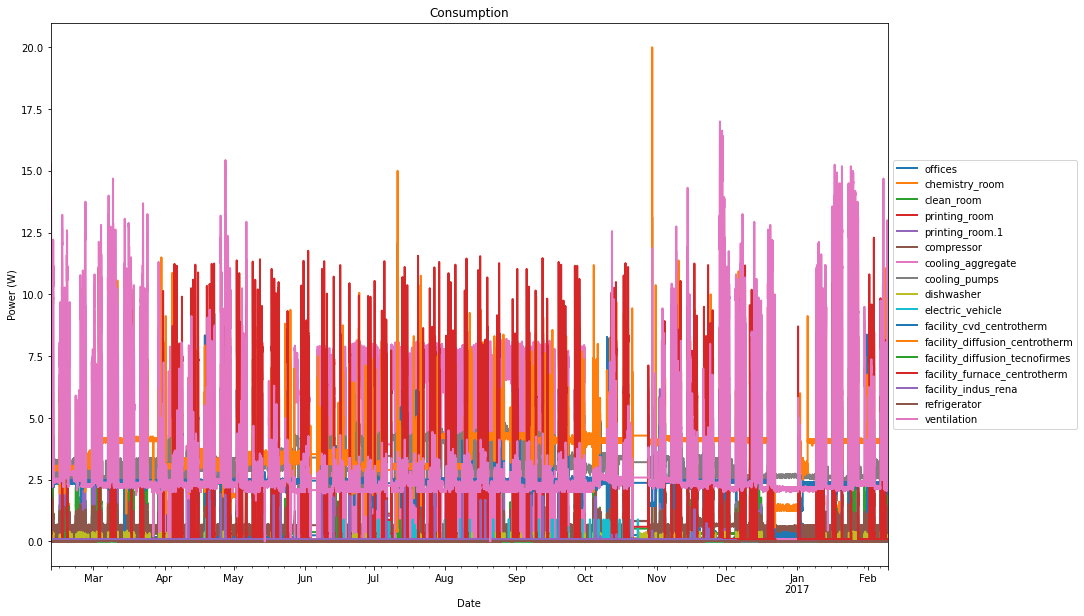

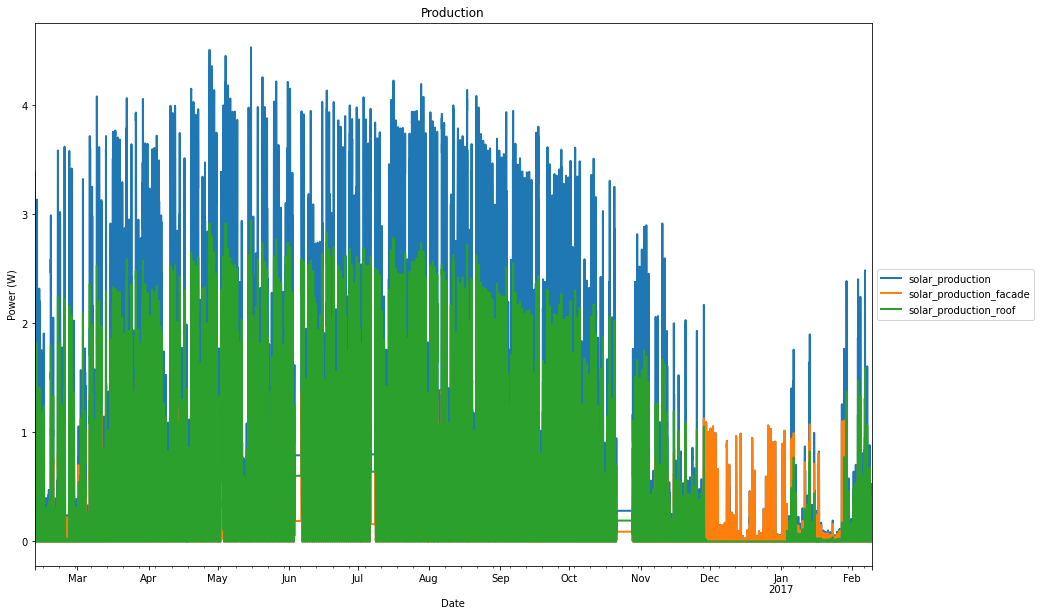

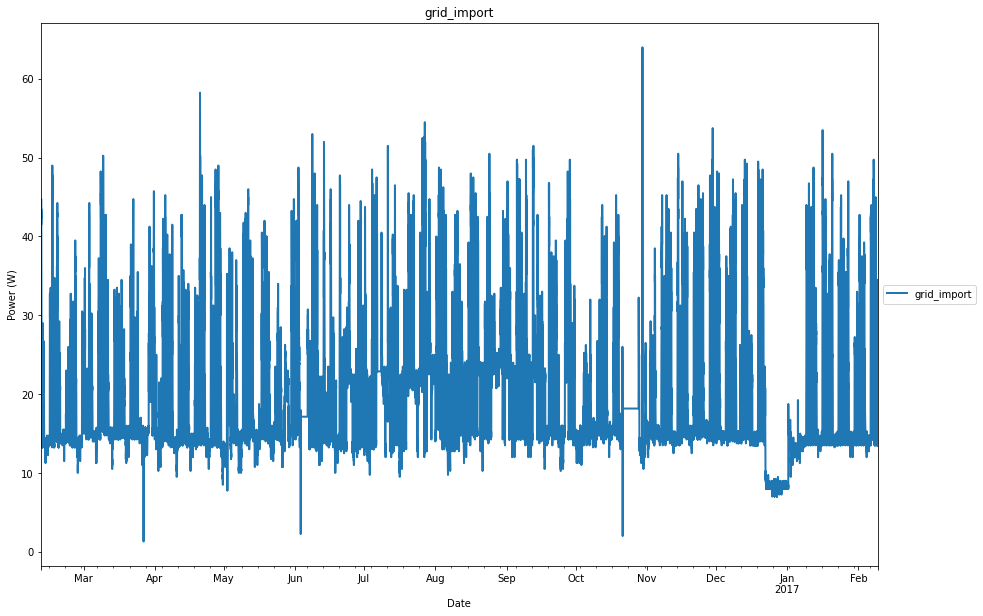

In [0]:
plot_df(consumption_df, "Consumption")
plot_df(production_df, "Production")
plot_df(grid_import_df, "grid_import")

#**Definition de deux fonctions statistiques pour enlever les valeurs extreme**

In [0]:
def where_arbitrary_quantile(df, percent):
  high_quantile = df.quantile(percent)
  high_outliers = (df > high_quantile)
  return df.where(~high_outliers, high_quantile, axis=1)


def where_iqr(df):
  q_25 = df.quantile(0.25)
  q_75=df.quantile(0.75)
  iqr=q_75-q_25
  high_quantile = q_75+iqr*1.5
  high_outliers = (df>q_75+iqr*1.5)
  return df.where(~high_outliers, high_quantile, axis=1)

In [0]:
where_arbitrary_quantile(grid_import_df, 0.9997).describe()

,grid_import
count,34946.000000
mean,19.888733
std,8.088464
min,1.306000
25%,14.250000
50%,15.750000
75%,23.750000
max,52.879125


In [0]:
where_iqr(grid_import_df).describe()

,grid_import
count,34946.000000
mean,19.688834
std,7.538830
min,1.306000
25%,14.250000
50%,15.750000
75%,23.750000
max,38.000000


In [0]:
consumption_outlier = where_arbitrary_quantile(consumption_df, 0.9997)
production_outlier = where_arbitrary_quantile(production_df, 0.9997)
grid_import_outlier = where_arbitrary_quantile(grid_import_df, 0.9997)

#**Somme toute les infos de consumption, production et grid**

In [0]:
consumption_outlier["global_consumption"] = consumption_outlier.sum(axis=1)
production_outlier["global_production"] = production_outlier.sum(axis=1)

In [0]:
global_df = consumption_outlier[["global_consumption"]].join(production_outlier[["global_production"]]).join(grid_import_outlier)
global_df.head()

,global_consumption,global_production,grid_import
timestamp,,,
2016-02-11 10:15:00+00:00,0.000,0.000,NaN
2016-02-11 10:30:00+00:00,29.902,4.815,31.75
2016-02-11 10:45:00+00:00,34.256,5.369,36.00
2016-02-11 11:00:00+00:00,33.159,5.732,34.25
2016-02-11 11:15:00+00:00,30.338,5.976,32.50


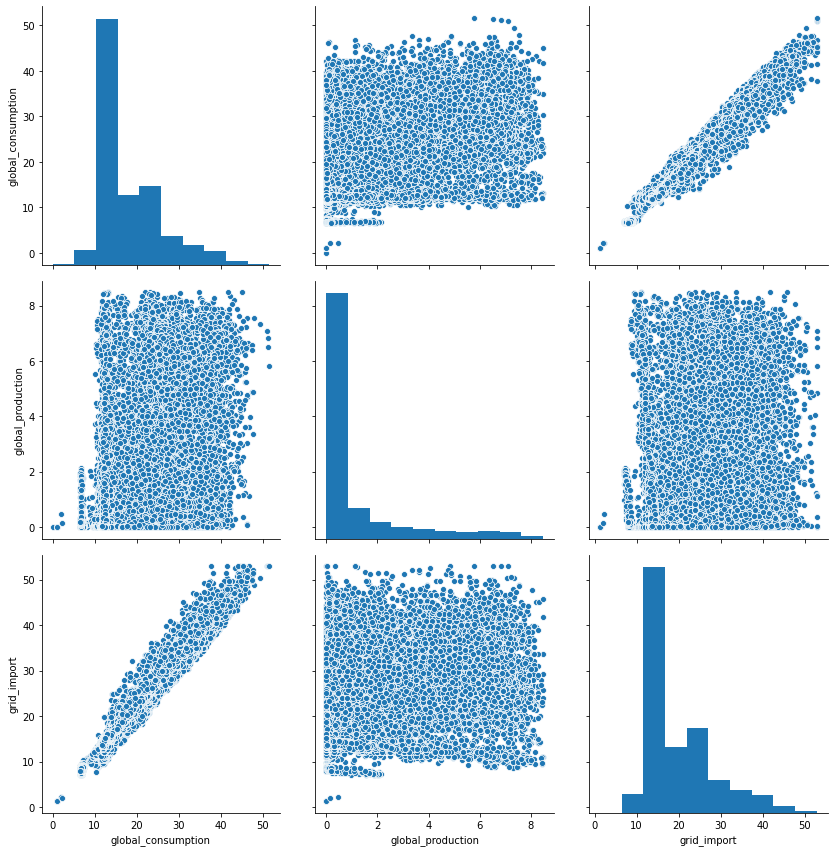

In [0]:
dist = sns.pairplot(global_df)
dist.fig.set_size_inches(12, 12) #Le graphe nous permet de voir que grid-import et global_consumption sont coreller

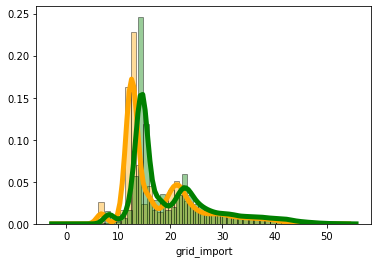

In [0]:
rcParams['figure.figsize'] = 6, 4
sns.distplot(global_df['global_consumption'].fillna(0), hist=True, kde=True, color = 'orange', hist_kws={'edgecolor':'black'}, kde_kws={'linewidth' : 5})
sns.distplot(global_df['grid_import'].fillna(0), hist=True, kde=True, color = 'green', hist_kws={'edgecolor':'black'}, kde_kws={'linewidth' : 5})


# Handling missing values



In [0]:
def plot_df(df, title):
  df.plot(title=(title), figsize=(15,10), lw=2)
  plt.xlabel('Date')
  plt.ylabel('Power (KW)')
  plt.legend(loc='best')
  plt.show()

In [0]:
def plot_multiple_features(df, subplots, fig_w, fig_h):
  fig, axes = plt.subplots(subplots,subplots,figsize = (fig_w, fig_h))
  for column, ax in zip(df.columns, axes.flatten()):
    df[[column]].plot(ax=ax, title=column, fontsize = 18)
    ax.tick_params(axis='x',labelsize=4)
    ax.tick_params(axis='y',labelsize=4, labelrotation=75)
    ax.xaxis.label.set_visible(False)
 

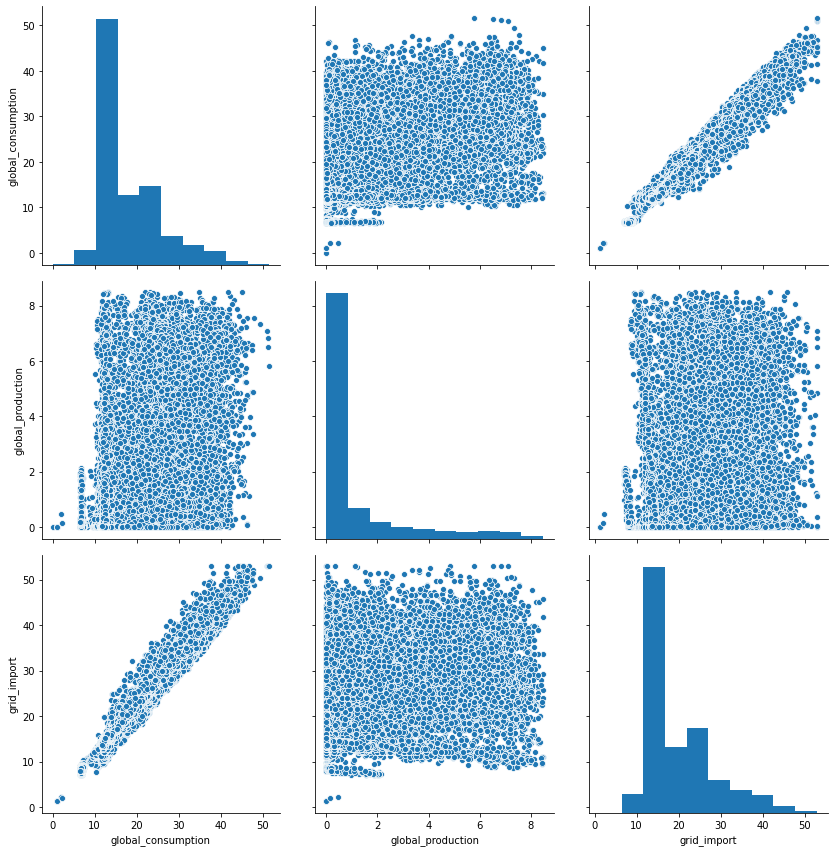

In [0]:
import seaborn as sns
dist = sns.pairplot(global_df)
dist.fig.set_size_inches(12,12)

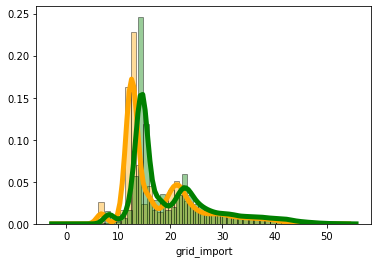

In [0]:
from pylab import rcParams
rcParams['figure.figsize'] = 6, 4
sns.distplot(global_df['global_consumption'].fillna(0), hist=True, kde=True, color = 'orange', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 5})
sns.distplot(global_df['grid_import'].fillna(0), hist=True, kde=True, color = 'green', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 5})

# Time series analysis
## Stationarity of time series data

**statsmodels** https://www.statsmodels.org/

In [0]:
from statsmodels.tsa.stattools import adfuller
print('Dickey Fuller Test \n Null hypothezsis states that the time series are non-stationary, and the alternative hypothesis states that time series are stationary')
ad_fuller_stat = adfuller(global_df['global_consumption'].resample('d').mean().fillna(method="bfill"), autolag='AIC')
plot_ad_fuller = pd.Series(ad_fuller_stat[0:4],index=['Test statistics','p-value','number of lags used','number of observations'])
for key,value in ad_fuller_stat[4].items():
    plot_ad_fuller['Critical value (%s)'%key] = value
print(plot_ad_fuller)

Dickey Fuller Test 
 Null hypothezsis states that the time series are non-stationary, and the alternative hypothesis states that time series are stationary
Test statistics            -3.082505
p-value                     0.027875
number of lags used        14.000000
number of observations    350.000000
Critical value (1%)        -3.449173
Critical value (5%)        -2.869833
Critical value (10%)       -2.571188
dtype: float64


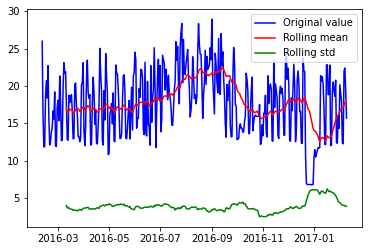

In [0]:
data_to_plot = global_df['global_consumption'].resample('d').mean().fillna(method="bfill")
ma =  data_to_plot.rolling(30).mean()
mstd = data_to_plot.rolling(30).std()

plt.plot(data_to_plot, color = 'blue', label = "Original value")
plt.plot(ma, color= 'red',  label = "Rolling mean")
plt.plot(mstd, color= 'green',  label = "Rolling std")
plt.legend()

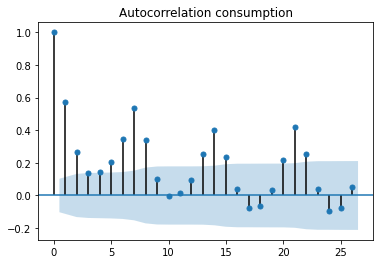

In [0]:
from statsmodels.graphics.tsaplots import plot_acf
a=plot_acf(global_df['global_consumption'].resample('D').mean(), title= 'Autocorrelation consumption')

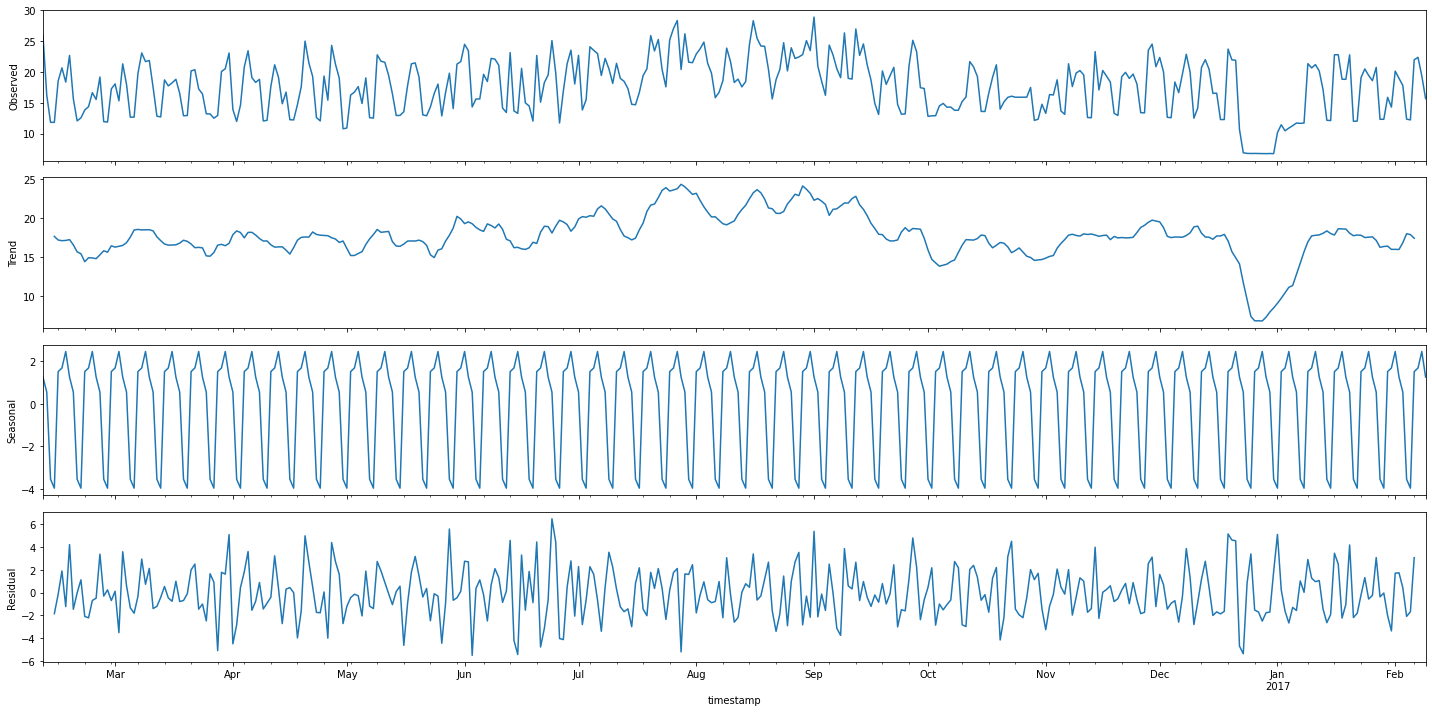

In [0]:
from pylab import rcParams
rcParams['figure.figsize'] = 20, 10
import statsmodels.api as sm
consumption_decomposed= sm.tsa.seasonal_decompose(global_df['global_consumption'].resample('D').mean())
fig = consumption_decomposed.plot()
plt.show()

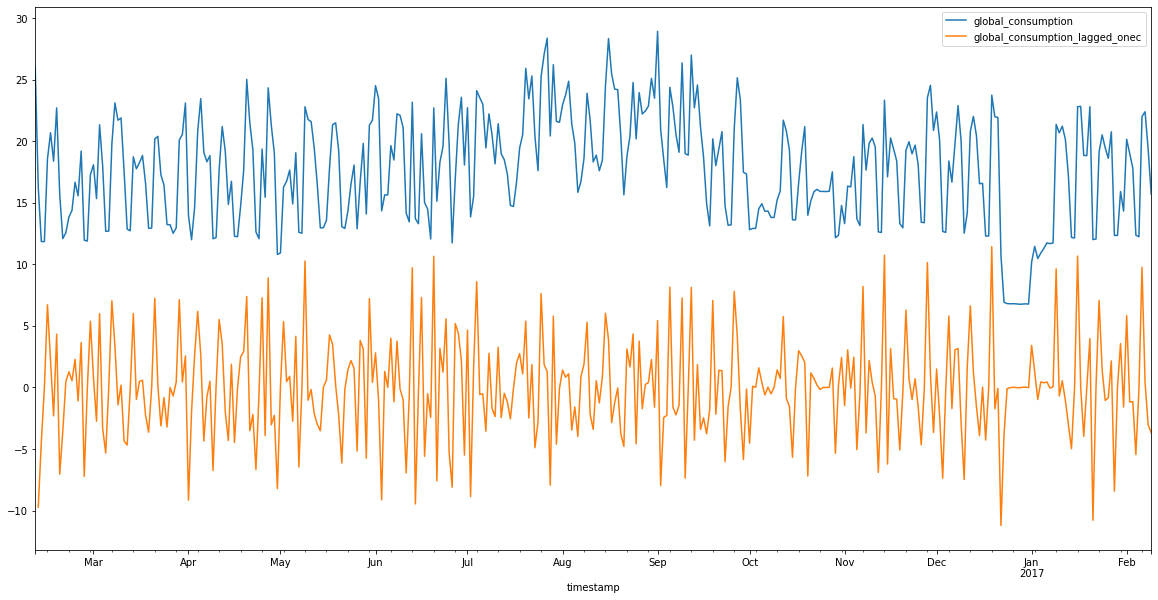

In [0]:
resampled_by_day_consumption = global_df[["global_consumption"]].resample('d').mean()
resampled_by_day_consumption['global_consumption_lagged_onec'] = resampled_by_day_consumption['global_consumption'].diff()
resampled_by_day_consumption.plot()

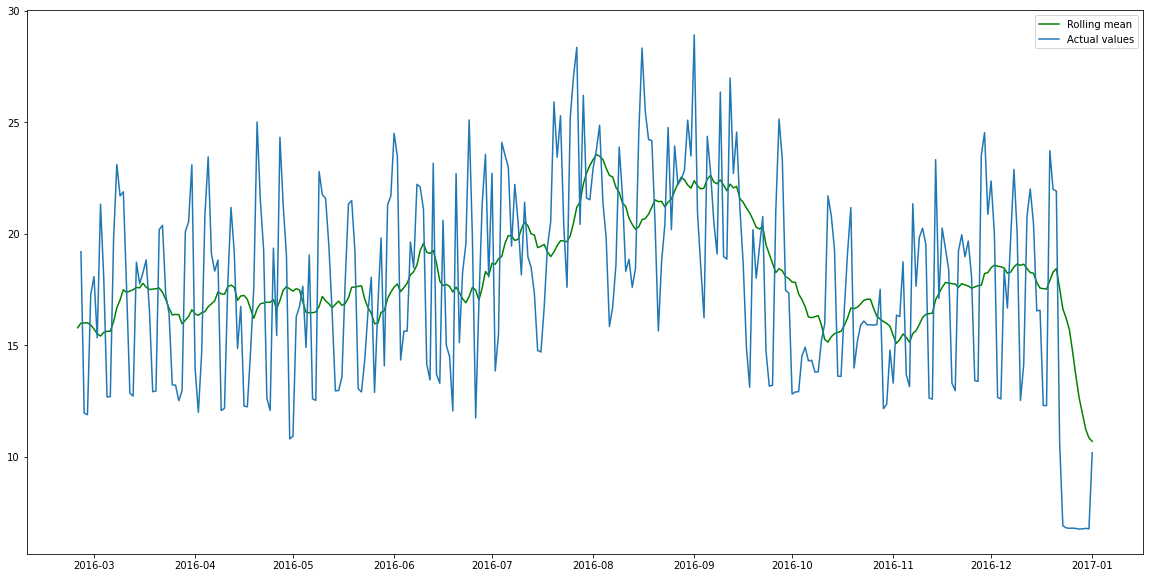

In [0]:
rolling_mean = resampled_by_day_consumption['global_consumption']['2016-02-11 10:15:00':'2017-01-01 00:00:00'].rolling(14).mean()
plt.plot(rolling_mean, "g", label = "Rolling mean")
plt.plot(resampled_by_day_consumption['global_consumption']['2016-02-11 10:15:00':'2017-01-01 00:00:00'][14:], label = "Actual values")
plt.legend(loc = "best")

In [0]:
from statsmodels.tsa.api import SimpleExpSmoothing

rcParams['figure.figsize'] = 20, 10
train, test = resampled_by_day_consumption["global_consumption_lagged_once"]['2016-02-11 10:15:00':'2017-01-01 00:00:00'].fillna(0), resampled_by_day_consumption["global_consumption_lagged_once"]['2017-01-01 00:00:00':'2017-02-09 10:45:00'].fillna(0)

model = SimpleExpSmoothing(train).fit(smoothing_level=0.9)
pred = model.predict(start=test.index[0], end=test.index[-1])
plt.title(model.model.params['smoothing_level'])
# plot
plt.plot(train.index, train, label='Train')
plt.plot(test.index, test, label='Test')
plt.plot(train.index, model.fittedvalues, label='Fitted values')
plt.plot(pred.index, pred, label='Simple Exponential Smoothing')
plt.legend(loc='best')

KeyError: ignored

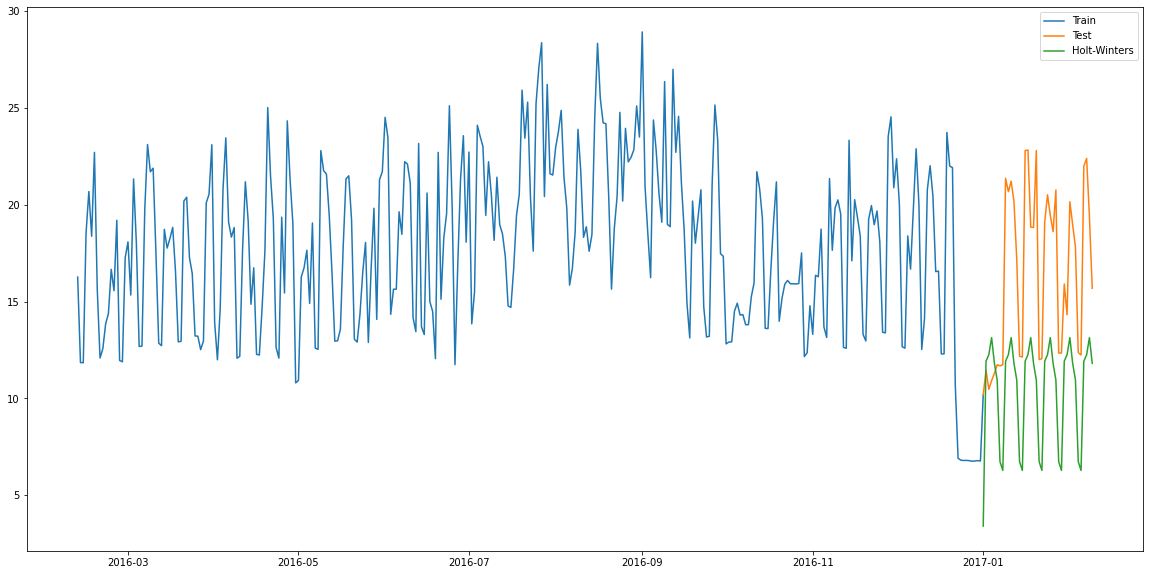

In [0]:
from statsmodels.tsa.api import ExponentialSmoothing

train, test = resampled_by_day_consumption["global_consumption"]['2016-02-11 10:15:00':'2017-01-01 00:00:00'].fillna(0), resampled_by_day_consumption["global_consumption"]['2017-01-01 00:00:00':'2017-02-09 10:45:00'].fillna(0)
model = ExponentialSmoothing(train, seasonal='add', trend='add',seasonal_periods=7).fit(use_boxcox=True)
pred = model.predict(start=test.index[0], end=test.index[-1])

plt.plot(train.index, train, label='Train')
plt.plot(test.index, test, label='Test')
#plt.plot(train.index, model.fittedvalues, label='Fitted values')
plt.plot(pred.index, pred, label='Holt-Winters')
plt.legend(loc='best')

# Advanced predictive modeling

**keras**  https://keras.io/

**sklearn** https://scikit-learn.org/stable/

In [0]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout

Using TensorFlow backend.


In [0]:
from keras.preprocessing.sequence import TimeseriesGenerator
generator = TimeseriesGenerator(train_scaled, train_scaled, length=7,  batch_size=1)
for i in range(len(generator)):
    x, y = generator[i]
    print('%s => %s' % (x, y))

NameError: ignored

In [0]:
predictor = Sequential()
predictor.add(LSTM(units=32, input_shape=(7,1)))
predictor.add(Dense(units=1))

predictor.compile(optimizer="adam", loss="mse")

predictor.fit_generator(generator, steps_per_epoch=1, epochs=50, verbose=1)

NameError: ignored

In [0]:
dataset_validation = pd.concat((train['global_consumption'], test["global_consumption"]), axis=0)
test_inputs = dataset_validation[len(dataset_validation) - len(test) - 7:].values.reshape(-1,1)
test_final = []
for i in range (7, len(test)):
    test_final.append(test_inputs[i-7:i, 0])
test_values = np.array(test_final)
test_values_reshaped = np.reshape(test_values, (test_values.shape[0], test_values.shape[1], 1))
prediction = predictor.predict(test_values_reshaped)


KeyError: ignored